In [45]:
from classy import Class

import os
import copy
import yaml
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from matplotlib import rc
from scipy.interpolate import interp1d

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

## warmup
run a fiducial cosmology and add stupid axions

In [46]:
LCDM =  Class()
baseline = {'omega_b':0.0223828,'omega_cdm':0.3,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'lensing':'yes'}
LCDM.set(baseline)
LCDM.set({'output': 'tCl,pCl,lCl','output_verbose': 1,'background_verbose':1})

True

In [47]:
ADE = Class()
ADE.set(baseline)
ADE.set({'output': 'tCl,pCl,lCl','output_verbose': 1,'background_verbose':1})
# ad axion fluid EDE
axion_zc = 10**3.677 
omega_n = 0.76
n = (1+omega_n)/(1-omega_n)

ADE.set({
    'fluid_equation_of_state': 'EDE',
    'ede_parametrization': 'pheno_axion_p',
    'fraction_fld_ac': 0.9,
#    'w_fld_i':-1,
    'w_fld_f':omega_n,
#    'cs2_fld':1.0,
    'Theta_initial_fld': 0.5
})



True

In [48]:
LCDM.compute()
ADE.compute()


Running CLASS version v3.3.0
Computing background
 -> age = 10.788708 Gyr
 -> conformal age = 10163.832339 Mpc
 -> H0 = 67.810000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 7706.738456
    corresponding to conformal time = 49.822509 Mpc
Running CLASS version v3.3.0
Computing background
pba->Omega0_fld 6.310783e+00  exp(integral_fld) 2.000000e+00
pba->Omega0_ur 3.717995e-05  exp(integral_fld) 0.000000e+00
 -> age = 7.882337 Gyr
 -> conformal age = 8726.330550 Mpc
 -> H0 = 67.810000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 7706.738456
    corresponding to conformal time = 49.822509 Mpc


## warmup 2  
plot stuff

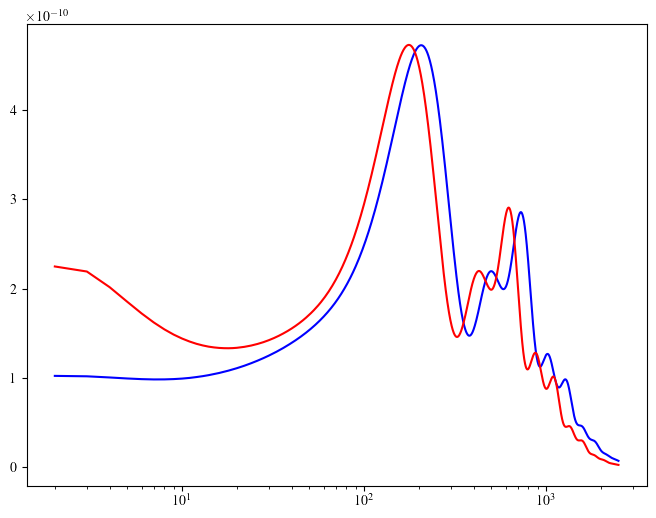

In [49]:
cls_l = LCDM.lensed_cl(2500)
cls = ADE.lensed_cl(2500)
cls_all = [cls_l, cls]
colors = ['blue', 'red']
for i in range(2):
    cls = cls_all[i]
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    clEE = cls['ee'][2:]
    clPP = cls['pp'][2:]
    pi = np.pi
    plt.plot(ll,clTT*ll*(ll+1)/2./pi, label='Baseline', color=colors[i])
    plt.xscale('log')

## for the equation of state,  
we are looking at background quantities:

In [50]:
bg = ADE.get_background()
print(bg.keys())

NameError: name 'axi_class' is not defined